<a href="https://colab.research.google.com/github/max-barker/AINT515/blob/main/Labs/Practical%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical 01: HSV Colour Space**
---



**Introduction**

The commonly used models in digital image processing are RGB (red, green, blue)
model and HSV (hue, saturation, brightness). RGB is widely used in color monitors and color video cameras. Our usual pictures are generally RGB models. The HSV model is more in line with the way people describe and interpret colors. The color description of HSV is natural and very intuitive to people.

**HSV model**

The color parameters in the HSV model are: hue (H: hue), saturation (S: saturation), and brightness (V: value). A color space created by A. R. Smith in 1978, also known as the Hexcone Model



*   **Hue:** Measured by an angle, the value range is 0°～360°, starting from red and counting in a counterclockwise direction, red is 0°, green is 120°, and blue is 240°. Their complementary colors are: 60° for yellow, 180° for cyan, and 300° for magenta;

*   **Saturation:** The value range is 0.0 to 1.0. The larger the value, the more saturated the color.

*   **Value:** The value range is 0 (black) to 255 (white).

**RGB to HSV (Theory)**

Let (r, g, b) be the red, green, and blue coordinates of a color, and their values are real numbers between 0 and 1. Let max be equivalent to the largest of r, g, and b. Let min be equal to the smallest of these values. To find the (h, s, v) value in the HSV space, where h ∈ [0, 360) is the hue angle of the angle, and s, v ∈ [0,1] is the saturation and brightness, calculated as:

```
max=max(R,G,B)
min=min(R,G,B)
if R = max, H = (G-B)/(max-min)
if G = max, H = 2 + (B-R)/(max-min)
if B = max, H = 4 + (R-G)/(max-min)
H = H * 60
if H < 0, H = H + 360
V=max(R,G,B)
S=(max-min)/max
```
**Implementation** 

There is a function under OpenCV that can directly convert RGB model to HSV model. Note that H ∈ [0, 180), S ∈ [0, 255], V ∈ [0, 255] in OpenCV. We know that the H component can basically represent the color of an object, but the values of S and V should also be within a certain range, because S represents the degree of mixing of the color represented by H and white, that is, the smaller S is, The whiter the color, the lighter the color; V represents the mixing degree of the color represented by H and black, that is, the smaller the V, the darker the color. After some experimenting, the value of blue is H from 110 to 130, and both S and V are between 90 and 255. More examples of hue and saturation values can be seen below:  
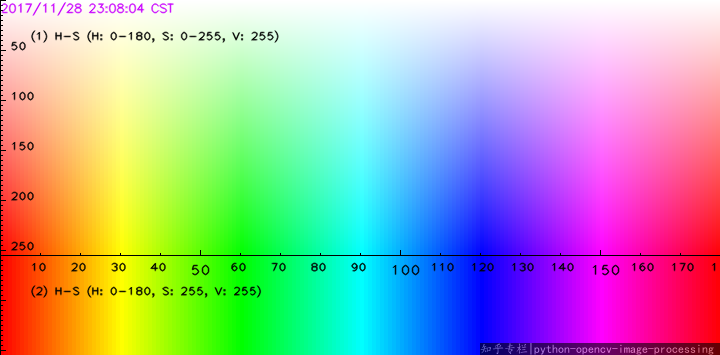





# **Colab Implementation**


---
Colab makes implementing these algorithms a lot easier, since it manages all the packages and compilation for you. This document is interactive, and you can modify any of the following code to see how it changes the output. Note, you need to save a copy of this lab sheet so that you can modify it.

**Importing Dependencies**

The code below will import the necessary libraries:

*   cv2: This is OpenCV, an open source computer vision library
*   numpy: A commonly used math library for python
*   pylab and pyplot: A plotting library that lets us display images

Click the play button next to the code to run it (the first time you click it, you may need to wait for google to connect you to a runtime host)









In [ ]:
import cv2 as cv   #opencv itself (under the name cv)
import numpy as np #numpy math library (under the name np)

#image displaying libraries
import pylab       
from matplotlib import pyplot as plt 

#make generated images appear inline below the code
%matplotlib inline 

#set the displayed image size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

**Downloading Sample Images**

Some example images have been uploaded to a github page for this demo. To import them into this project, run the following code which fetches them from the repository.

You can find the files in the file explorer to the left (You may need to click the "refresh drive" button at the top of the menu to see the downloaded files).


In [ ]:
# Download example images
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/639b2256177ec9eba5f240b8a2eed5905cfe2fd6/AINT515/Practical01/HSV-Test-1.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/639b2256177ec9eba5f240b8a2eed5905cfe2fd6/AINT515/Practical01/HSV-Test-2.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/639b2256177ec9eba5f240b8a2eed5905cfe2fd6/AINT515/Practical01/HSV-Test-3.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/639b2256177ec9eba5f240b8a2eed5905cfe2fd6/AINT515/Practical01/HSV-Test-4.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/639b2256177ec9eba5f240b8a2eed5905cfe2fd6/AINT515/Practical01/HSV-Test-5.jpg


**Loading the Image with OpenCV**

The images have been downloaded into your project folder, but are not yet imported into your program. OpenCV uses the function "imread()" to import image files. Feel free to change this image to any of the 5 example images you've downloaded.

Once imported it stores the image as a "Mat" datatype called "input_image". By default it loads the image in a BGR (blue green red) format, but we want it as an RGB format. The "cvtColor()" function makes it easy to convert between these colour spaces.

Finally, "imshow()" is used to display the Mat datatype as an image below.

In [ ]:
input_image=cv.imread('HSV-Test-5.jpg')                       #import the image as a Mat
input_image_RGB = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)  #convert the image to an RGB format so it can be displayed correctly
plt.imshow(input_image_RGB)                                   #plot the image

**HSV and Thresholding**

Now the image is ready to be used, we can use HSV to detect colours. Firstly, using the same function as before (cvtColor), the image can be converted into the HSV format. This is useful for colour detection since hue is a lot more useful and robust to lighting/shadows than red green and blue values

Secondly, "inRange()" is used to search for specific values of H,S and V. In this case, the limits have been set to look for green:

*   Hue(50-70): Using the image above, these are the hue values for green
*   Saturation(10-255): A value of 0 is pure grey and has no meaningful hue value, so the range has been set to accept all saturations except that near 0
*   Value(10-255): A value of 0 is black, so the range has been set for the same reasons as above.

In [ ]:
#convert to HSV
hsv_image = cv.cvtColor(input_image_RGB, cv.COLOR_RGB2HSV) 

#define HSV ranges
low_H = 50
high_H = 70

low_S = 10
high_S = 255

low_V = 10
high_V = 255

#threshold image to detect just green pixels
threshold_image = cv.inRange(hsv_image, (low_H, low_S, low_V), (high_H, high_S, high_V))

#show image
plt.imshow(threshold_image)

**Filtering**

As you can see from above, computing this range for every pixel creates a noisy image. Any single pixel that passes the check will appear in the output. To fix this, an algorithm called morphological filtering is used.

Morphological filtering is all about local neighbouring pixels. "Erode()" will have the affect of tracing an erase brush around the perimeter of a shape, making it skinnier. "Dilate()" has the affect of tracing a paint brush around a shape, making it fatter. Together, they can be used to filter out noise.

Imagine a large blob of pixels. Eroding the shape, then dilating it, will have very little affect on its overall size. However imagine a small group of pixels. The erode step completely  removes them, so there is nothing left to dilate in the next step. Thus, this process leaves large clusters of pixels unchanged, but removes small clusters of pixels.

The brush size and shape changes what is filtered out, have a play with the settings to see how it changes the output. More details on these algorithms can be found [here](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)

In [ ]:
#create a circular brush size 5
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)) 

#filter image
threshold_image = cv.erode(threshold_image,kernel,iterations = 1)  
threshold_image = cv.dilate(threshold_image,kernel,iterations = 1)

#show image
plt.imshow(threshold_image)

# **Summary**

---



As you can see from the above process, HSV makes colour thresholding and detection a lot easier when compared to RGB. The example images that were provided include many hues and saturations, so have a play and try to isolate some other colours. How clean can you get the image by tuning the range values and filtering? Are there any trade offs?
